<a href="https://colab.research.google.com/github/anajuglaserjv/analise_dados_covid_2/blob/main/projeto_covid_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 2

## Carregar módulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Carregar dados

In [ ]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [ ]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [ ]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


## Ajustes



- Nomes das colunas

In [ ]:
dados_paises_covid.rename(columns={"Province/State": "province",
                                   "Country/Region": "country"},
                          inplace=True)

In [ ]:
dados_paises_covid_dead.rename(columns={"Province/State": "province",
                                        "Country/Region": "country"},
                               inplace=True)

In [ ]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados

In [ ]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                             var_name = 'date',
                                             value_name = 'infected')

In [ ]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                                       var_name = 'date',
                                                       value_name = 'dead')

In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [ ]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [ ]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],
                                            infer_datetime_format='True')

<ipython-input-12-c40cd7852016>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],
<ipython-input-12-c40cd7852016>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],


In [ ]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'],
                                                 infer_datetime_format='True')

<ipython-input-13-233e13507b25>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'],
<ipython-input-13-233e13507b25>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'],


In [ ]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,5671


In [ ]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [ ]:
dados_paises_covid.shape

(330327, 6)

In [ ]:
dados_paises_covid_dead.shape

(330327, 6)

In [ ]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead,
                       on = ['province', 'country',	'Lat',	'Long',	'date'],
                       how = 'inner')

In [ ]:
dados_covid.tail()

,province,country,Lat,Long,date,infected,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276,5671


In [ ]:
dados_covid.shape

(330327, 7)

## Aqui começa o trabalho

## *Exemplo probabilidades (memórias de cálculo)

- Prob(infectados covid)

total infectados = soma do total de infectados dos 4 países

total_populacao = soma do total de população dos 4 países

P(infectados) = total infectados / total_populacao

- P(infectado covid e ser Brasileiro)

infectado_e_brasil = total de infectados do Brasil

P(infectado covid e ser Brasileiro) = infectado_e_brasil / total_populacao

- P(Infectado covid | ser Brasileiro)

total_brasil_populacao = populacao do Brasil

P(Infectado covid | ser Brasileiro) = (infectado_e_brasil / total_populacao) / (total_brasil_populacao / total_populacao)

ou

P(Infectado covid | ser Brasileiro) = infectado_e_brasil / total_brasil_populacao

In [ ]:
from datetime import datetime, timedelta

# 1)  Filtrar a data mais recente (realizar o processo para buscar a última data de forma
automatizada) e os países Brasil, Itália, E.U.A e Canadá.

In [ ]:
paises_desejados = ['Brazil', 'Italy', 'US', 'Canada']
dados_paises_desejados = dados_covid[dados_covid['country'].isin(paises_desejados)]

In [ ]:
ultima_data = dados_paises_desejados['date'].max()
dados_ultima_data = dados_paises_desejados[dados_paises_desejados['date'] == ultima_data]

In [ ]:
dados_ultima_data

,province,country,Lat,Long,date,infected,dead
330069,NaN,Brazil,-14.23500,-51.92530,2023-03-09,37076053,699276
330078,Alberta,Canada,53.93330,-116.57650,2023-03-09,629269,5622
330079,British Columbia,Canada,53.72670,-127.64760,2023-03-09,396817,5249
330080,Diamond Princess,Canada,0.00000,0.00000,2023-03-09,0,1
330081,Grand Princess,Canada,0.00000,0.00000,2023-03-09,13,0
330082,Manitoba,Canada,53.76090,-98.81390,2023-03-09,154712,2464
330083,New Brunswick,Canada,46.56530,-66.46190,2023-03-09,88866,834
330084,Newfoundland and Labrador,Canada,53.13550,-57.66040,2023-03-09,54757,318
330085,Northwest Territories,Canada,64.82550,-124.84570,2023-03-09,11511,22
330086,Nova Scotia,Canada,44.68200,-63.74430,2023-03-09,140793,794


# 2) Pesquisar populações de Brasil, Itália, E.U.A. e Canadá. Depois, adicionar estas populações
como uma coluna no dataset.

In [ ]:
populacoes = {
    'Brazil': 213993437,
    'Italy': 60461826,
    'US': 331002651,
    'Canada': 37742154
}

In [ ]:
#ultima_data = dados_ultima_data.drop(columns=['populacao'])
agrupados = dados_ultima_data.groupby('country')[['infected', 'dead']].sum().reset_index()
agrupados['populacao'] = agrupados['country'].map(populacoes)
agrupados

,country,infected,dead,populacao
0,Brazil,37076053,699276,213993437
1,Canada,4617095,51720,37742154
2,Italy,25603510,188322,60461826
3,US,103802702,1123836,331002651


# 3) – Considerando somente os dados dos países apresentados, encontre as seguintes
probabilidades, baseando-se na coluna de infectados:


In [ ]:
total_infectados = agrupados['infected'].sum()
total_populacao = agrupados['populacao'].sum()
print(f'Total de infectados dos paises Brasil, Itália, E.U.A. e Canadá: {total_infectados}\nPopulação total Brasil, Itália, E.U.A. e Canadá: {total_populacao:^40} ')

Total de infectados dos paises Brasil, Itália, E.U.A. e Canadá: 171099360
População total Brasil, Itália, E.U.A. e Canadá:                643200068                 


In [ ]:
# A)  P(infectado covid) =  total infectados / total_populacao
prob_infec = (total_infectados / total_populacao) * 100
print(f'Probabilidade de infectados nos paises Brasil, Itália, E.U.A. e Canadá: {prob_infec:.3f}% ')

Probabilidade de infectados nos paises Brasil, Itália, E.U.A. e Canadá: 26.601% 


# BRASIL

In [ ]:
# B) P(infectado covid e ser Brasileiro) = infectado_e_brasil / total_populacao
br = agrupados[agrupados['country'] == 'Brazil']
infectados_br = br['infected'].values[0]
prob_infec_e_br = (infectados_br / total_populacao) * 100
print(f'Probabilidade de ser infectado e ser Brasileiro é de {prob_infec_e_br:.3f}% ')

Probabilidade de ser infectado e ser Brasileiro é de 5.764% 


In [ ]:
# C) P(Infectado covid | ser Brasileiro) = infectado_e_brasil / total_brasil_populacao
total_pop_br = br['populacao'].values[0]
prop_infec_dado_br = (infectados_br / total_pop_br) * 100
print(f'Probabilidade de ser infectado dado que é Brasileiro é de {prop_infec_dado_br:.3f}% ')

Probabilidade de ser infectado dado que é Brasileiro é de 17.326% 


#D) Compare estes resultados com o mesmo período do ano passado.


In [ ]:
dados_data_2022 = dados_paises_desejados[dados_paises_desejados['date'] == '2022-03-09']
dados_data_2022

,province,country,Lat,Long,date,infected,dead
224584,NaN,Brazil,-14.23500,-51.92530,2022-03-09,29198101,653767
224593,Alberta,Canada,53.93330,-116.57650,2022-03-09,529736,3986
224594,British Columbia,Canada,53.72670,-127.64760,2022-03-09,351415,2929
224595,Diamond Princess,Canada,0.00000,0.00000,2022-03-09,0,1
224596,Grand Princess,Canada,0.00000,0.00000,2022-03-09,13,0
224597,Manitoba,Canada,53.76090,-98.81390,2022-03-09,132295,1703
224598,New Brunswick,Canada,46.56530,-66.46190,2022-03-09,40654,313
224599,Newfoundland and Labrador,Canada,53.13550,-57.66040,2022-03-09,28103,72
224600,Northwest Territories,Canada,64.82550,-124.84570,2022-03-09,9400,20
224601,Nova Scotia,Canada,44.68200,-63.74430,2022-03-09,47089,212


In [ ]:
agrupados_2022 = dados_data_2022.groupby('country')[['infected', 'dead']].sum().reset_index()
agrupados_2022['populacao'] = agrupados_2022['country'].map(populacoes)
agrupados_2022

,country,infected,dead,populacao
0,Brazil,29198101,653767,213993437
1,Canada,3356440,37158,37742154
2,Italy,13159342,156357,60461826
3,US,79536060,963275,331002651


Probabilidade de infectados nos 4 países em 09/03/2022: 19.473%
Probabilidade de infectados nos 4 países em 09/03/2023: 26.601%


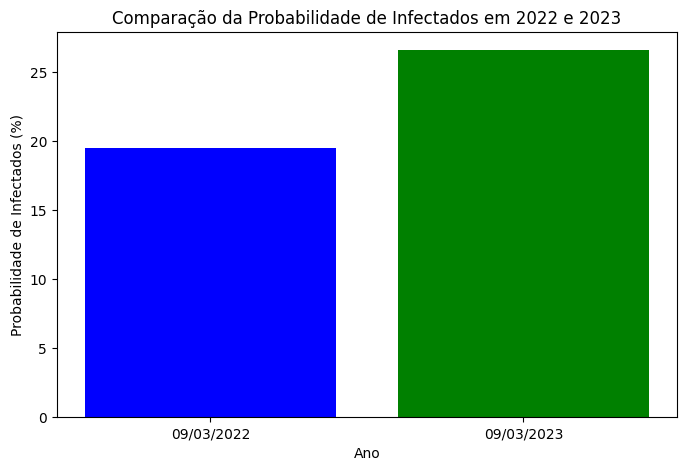

In [ ]:
#D) P(infectado covid)
total_infectados_2022 = agrupados_2022['infected'].sum()
prob_infec_2022 = (total_infectados_2022 / total_populacao) * 100
print(f'Probabilidade de infectados nos 4 países em 09/03/2022: {prob_infec_2022:.3f}%')
print(f'Probabilidade de infectados nos 4 países em 09/03/2023: {prob_infec:.3f}%')
anos = ['09/03/2022', '09/03/2023']
probabilidades = [prob_infec_2022, prob_infec]
plt.figure(figsize=(8, 5))
plt.bar(anos, probabilidades, color=['blue', 'green'])
plt.xlabel('Ano')
plt.ylabel('Probabilidade de Infectados (%)')
plt.title('Comparação da Probabilidade de Infectados em 2022 e 2023')
plt.show()

Probabilidade de ser infectado e ser Brasileiro em 09/03/2022 é de 4.540% 
Probabilidade de ser infectado e ser Brasileiro em 09/03/2023 é de 5.764% 


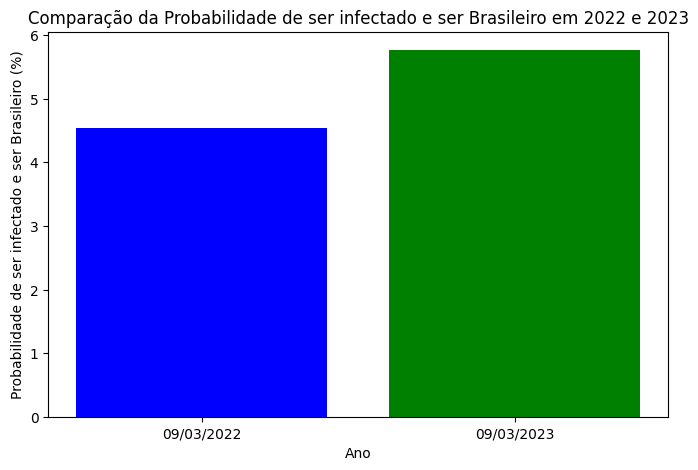

In [ ]:
#D) P(infectado covid e ser Brasileiro) = infectado_e_brasil / total_populacao
br2022 = agrupados_2022[agrupados_2022['country'] == 'Brazil']
infectados_br_2022 = br2022['infected'].values[0]
prob_infec_e_br_2022 = (infectados_br_2022 / total_populacao) * 100
print(f'Probabilidade de ser infectado e ser Brasileiro em 09/03/2022 é de {prob_infec_e_br_2022:.3f}% ')
print(f'Probabilidade de ser infectado e ser Brasileiro em 09/03/2023 é de {prob_infec_e_br:.3f}% ')

# Grafico de barras
probabilidades_br = [prob_infec_e_br_2022, prob_infec_e_br]
plt.figure(figsize=(8, 5))
plt.bar(anos, probabilidades_br, color=['blue', 'green'])
plt.xlabel('Ano')
plt.ylabel('Probabilidade de ser infectado e ser Brasileiro (%)')
plt.title('Comparação da Probabilidade de ser infectado e ser Brasileiro em 2022 e 2023')
plt.show()

Probabilidade de ser infectado dado que é Brasileiro em 09/03/2022 era: 13.644% 
Probabilidade de ser infectado dado que é Brasileiro em 09/03/2023 era: 17.326% 


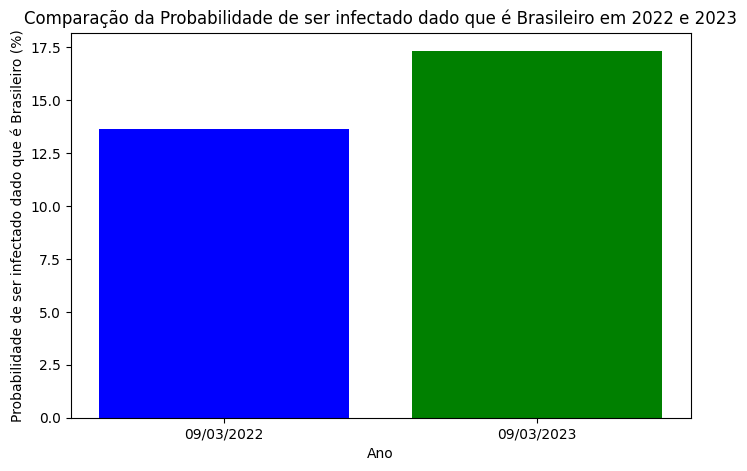

In [ ]:
#D) P(Infectado covid | ser Brasileiro) = infectado_e_brasil / total_brasil_populacao
total_pop_br_2022 = br2022['populacao'].values[0]
prop_infec_dado_br_2022 = (infectados_br_2022 / total_pop_br_2022) * 100
print(f'Probabilidade de ser infectado dado que é Brasileiro em 09/03/2022 era: {prop_infec_dado_br_2022:.3f}% ')
print(f'Probabilidade de ser infectado dado que é Brasileiro em 09/03/2023 era: {prop_infec_dado_br:.3f}% ')

# Grafico de barras
probabilidades_dado_br = [prop_infec_dado_br_2022, prop_infec_dado_br]
plt.figure(figsize=(8, 5))
plt.bar(anos, probabilidades_dado_br, color=['blue', 'green'])
plt.xlabel('Ano')
plt.ylabel('Probabilidade de ser infectado dado que é Brasileiro (%)')
plt.title('Comparação da Probabilidade de ser infectado dado que é Brasileiro em 2022 e 2023')
plt.show()


# ESTADOS UNIDOS

In [ ]:
# E) P(infectado covid e ser USA) = infectado_e_USA / total_populacao

usa = agrupados[agrupados['country'] == 'US']
infectados_usa = usa['infected'].values[0]
prob_infec_e_usa = (infectados_usa / total_populacao) * 100
print(f'Probabilidade de ser infectado e ser Americano é de {prob_infec_e_usa:.3f}% ')

Probabilidade de ser infectado e ser Americano é de 16.138% 


In [ ]:
# F) P(infectado covid | ser USA)  = infectado_e_usa / total_USA
total_pop_usa = usa['populacao'].values[0]
prop_infec_dado_usa = (infectados_usa / total_pop_usa) * 100
print(f'Probabilidade de ser infectado dado que é Americano é de {prop_infec_dado_usa:.3f}% ')

Probabilidade de ser infectado dado que é Americano é de 31.360% 


# G) Compare estes resultados com o mesmo período do ano passado.

Probabilidade de ser infectado e ser Americano em 09/03/2022 é de 12.366% 
Probabilidade de ser infectado e ser Americano em 09/03/2023 é de 16.138% 


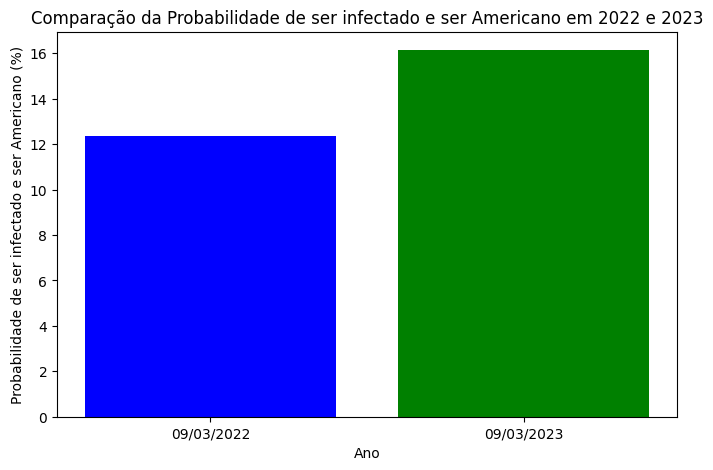

In [ ]:
usa2022 = agrupados_2022[agrupados_2022['country'] == 'US']
infectados_usa_2022 = usa2022['infected'].values[0]
prob_infec_e_usa_2022 = (infectados_usa_2022 / total_populacao) * 100
print(f'Probabilidade de ser infectado e ser Americano em 09/03/2022 é de {prob_infec_e_usa_2022:.3f}% ')
print(f'Probabilidade de ser infectado e ser Americano em 09/03/2023 é de {prob_infec_e_usa:.3f}% ')

# Grafico de barras
probabilidades_usa = [prob_infec_e_usa_2022, prob_infec_e_usa]
plt.figure(figsize=(8, 5))
plt.bar(anos, probabilidades_usa, color=['blue', 'green'])
plt.xlabel('Ano')
plt.ylabel('Probabilidade de ser infectado e ser Americano (%)')
plt.title('Comparação da Probabilidade de ser infectado e ser Americano em 2022 e 2023')
plt.show()

Probabilidade de ser infectado dado que é Americano em 09/03/2022 era: 24.029% 
Probabilidade de ser infectado dado que é Americano em 09/03/2023 era: 31.360% 


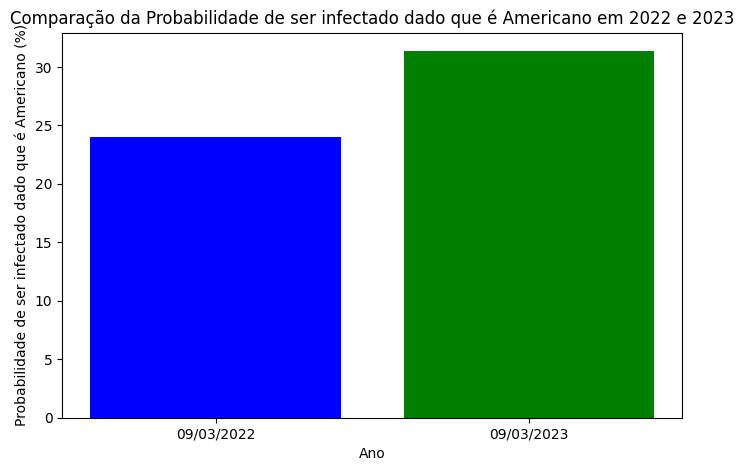

In [ ]:
total_pop_usa_2022 = usa2022['populacao'].values[0]
prop_infec_dado_usa_2022 = (infectados_usa_2022 / total_pop_usa_2022) * 100
print(f'Probabilidade de ser infectado dado que é Americano em 09/03/2022 era: {prop_infec_dado_usa_2022:.3f}% ')
print(f'Probabilidade de ser infectado dado que é Americano em 09/03/2023 era: {prop_infec_dado_usa:.3f}% ')

# Grafico de barras
probabilidades_dado_usa = [prop_infec_dado_usa_2022, prop_infec_dado_usa]
plt.figure(figsize=(8, 5))
plt.bar(anos, probabilidades_dado_usa, color=['blue', 'green'])
plt.xlabel('Ano')
plt.ylabel('Probabilidade de ser infectado dado que é Americano (%)')
plt.title('Comparação da Probabilidade de ser infectado dado que é Americano em 2022 e 2023')
plt.show()

# ITALIA

In [ ]:
# H) P(infectado covid e ser ITALIA) = infectado_e_Italia / total_populacao

italy = agrupados[agrupados['country'] == 'Italy']
infectados_italy = italy['infected'].values[0]
prob_infec_e_italy = (infectados_italy / total_populacao) * 100
print(f'Probabilidade de ser infectado e ser Italiano é de {prob_infec_e_italy:.3f}% ')

Probabilidade de ser infectado e ser Italiano é de 3.981% 


In [ ]:
# F) P(infectado covid | ser Italia)  = infectado_e_italia / total_italia
total_pop_italy = italy['populacao'].values[0]
prop_infec_dado_italy = (infectados_italy / total_pop_italy) * 100
print(f'Probabilidade de ser infectado dado que é Italiano é de {prop_infec_dado_italy:.3f}% ')

Probabilidade de ser infectado dado que é Italiano é de 42.347% 


# j) Compare estes resultados com o mesmo período do ano passado.

Probabilidade de ser infectado e ser Italiano em 09/03/2022 é de 12.366% 
Probabilidade de ser infectado e ser Italiano em 09/03/2023 é de 3.981% 


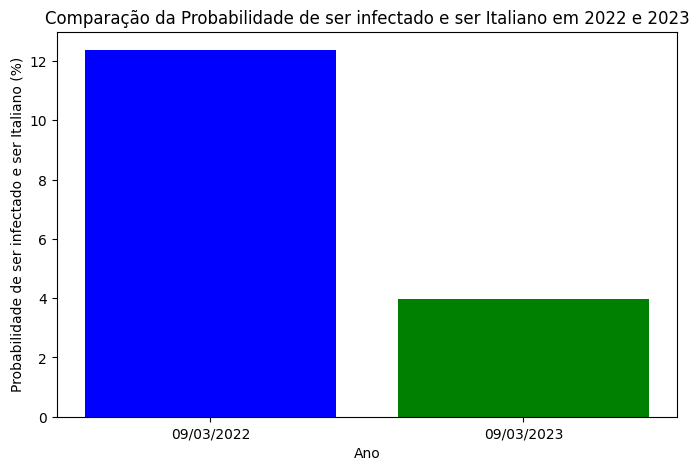

In [ ]:
italy2022 = agrupados_2022[agrupados_2022['country'] == 'US']
infectados_italy_2022 = italy2022['infected'].values[0]
prob_infec_e_italy_2022 = (infectados_italy_2022 / total_populacao) * 100
print(f'Probabilidade de ser infectado e ser Italiano em 09/03/2022 é de {prob_infec_e_italy_2022:.3f}% ')
print(f'Probabilidade de ser infectado e ser Italiano em 09/03/2023 é de {prob_infec_e_italy:.3f}% ')

# Grafico de barras
probabilidades_italy = [prob_infec_e_italy_2022, prob_infec_e_italy]
plt.figure(figsize=(8, 5))
plt.bar(anos, probabilidades_italy, color=['blue', 'green'])
plt.xlabel('Ano')
plt.ylabel('Probabilidade de ser infectado e ser Italiano (%)')
plt.title('Comparação da Probabilidade de ser infectado e ser Italiano em 2022 e 2023')
plt.show()

Probabilidade de ser infectado dado que é Italiano em 09/03/2022 era: 24.029% 
Probabilidade de ser infectado dado que é Italiano em 09/03/2023 era: 42.347% 


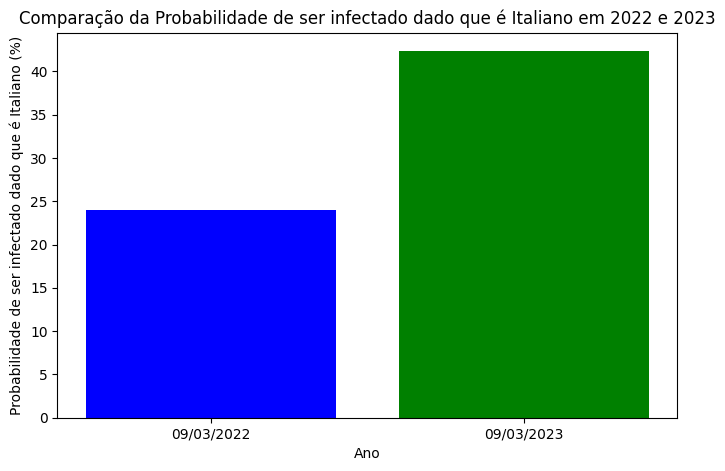

In [ ]:
total_pop_italy_2022 = italy2022['populacao'].values[0]
prop_infec_dado_italy_2022 = (infectados_italy_2022 / total_pop_italy_2022) * 100
print(f'Probabilidade de ser infectado dado que é Italiano em 09/03/2022 era: {prop_infec_dado_italy_2022:.3f}% ')
print(f'Probabilidade de ser infectado dado que é Italiano em 09/03/2023 era: {prop_infec_dado_italy:.3f}% ')

# Grafico de barras
probabilidades_dado_italy = [prop_infec_dado_italy_2022, prop_infec_dado_italy]
plt.figure(figsize=(8, 5))
plt.bar(anos, probabilidades_dado_italy, color=['blue', 'green'])
plt.xlabel('Ano')
plt.ylabel('Probabilidade de ser infectado dado que é Italiano (%)')
plt.title('Comparação da Probabilidade de ser infectado dado que é Italiano em 2022 e 2023')
plt.show()

# CANADA

In [ ]:
canada = agrupados[agrupados['country'] == 'Canada']
infectados_canada = canada['infected'].values[0]
prob_infec_e_canada = (infectados_canada / total_populacao) * 100
print(f'Probabilidade de ser infectado e ser Canadense é de {prob_infec_e_canada:.3f}% ')

Probabilidade de ser infectado e ser Canadense é de 0.718% 


In [ ]:
total_pop_canada = canada['populacao'].values[0]
prop_infec_dado_canada = (infectados_canada / total_pop_canada) * 100
print(f'Probabilidade de ser infectado dado que é Canadense é de {prop_infec_dado_canada:.3f}% ')

Probabilidade de ser infectado dado que é Canadense é de 12.233% 


Probabilidade de ser infectado e ser Canadense em 09/03/2022 é de 0.522% 
Probabilidade de ser infectado e ser Canadense em 09/03/2023 é de 0.718% 


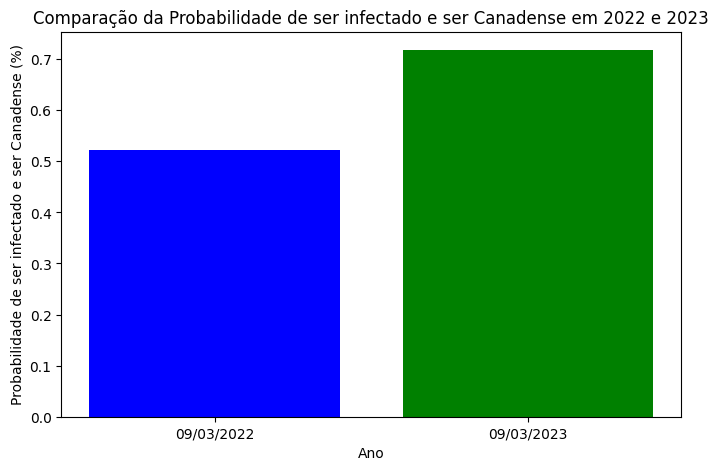

In [ ]:
canada2022 = agrupados_2022[agrupados_2022['country'] == 'Canada']
infectados_canada_2022 = canada2022['infected'].values[0]
prob_infec_e_canada_2022 = (infectados_canada_2022 / total_populacao) * 100
print(f'Probabilidade de ser infectado e ser Canadense em 09/03/2022 é de {prob_infec_e_canada_2022:.3f}% ')
print(f'Probabilidade de ser infectado e ser Canadense em 09/03/2023 é de {prob_infec_e_canada:.3f}% ')

# Grafico de barras
probabilidades_canada = [prob_infec_e_canada_2022, prob_infec_e_canada]
plt.figure(figsize=(8, 5))
plt.bar(anos, probabilidades_canada, color=['blue', 'green'])
plt.xlabel('Ano')
plt.ylabel('Probabilidade de ser infectado e ser Canadense (%)')
plt.title('Comparação da Probabilidade de ser infectado e ser Canadense em 2022 e 2023')
plt.show()

Probabilidade de ser infectado dado que é Canadense em 09/03/2022 era: 8.893% 
Probabilidade de ser infectado dado que é Canadense em 09/03/2023 era: 12.233% 


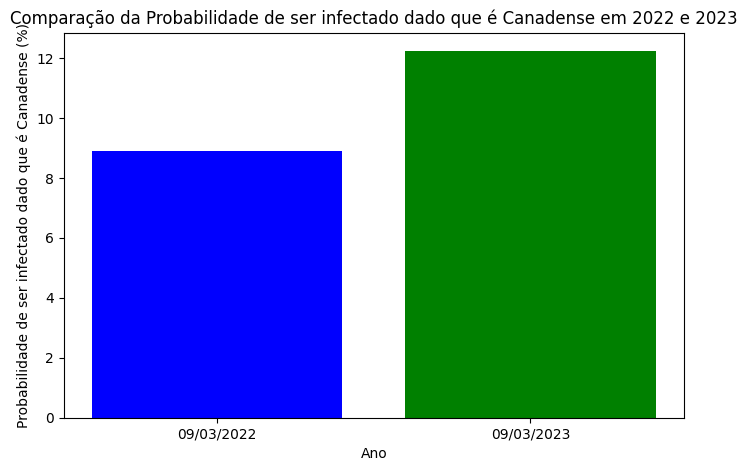

In [ ]:
total_pop_canada_2022 = canada2022['populacao'].values[0]
prop_infec_dado_canada_2022 = (infectados_canada_2022 / total_pop_canada_2022) * 100
print(f'Probabilidade de ser infectado dado que é Canadense em 09/03/2022 era: {prop_infec_dado_canada_2022:.3f}% ')
print(f'Probabilidade de ser infectado dado que é Canadense em 09/03/2023 era: {prop_infec_dado_canada:.3f}% ')

# Grafico de barras
probabilidades_dado_canada = [prop_infec_dado_canada_2022, prop_infec_dado_canada]
plt.figure(figsize=(8, 5))
plt.bar(anos, probabilidades_dado_canada, color=['blue', 'green'])
plt.xlabel('Ano')
plt.ylabel('Probabilidade de ser infectado dado que é Canadense (%)')
plt.title('Comparação da Probabilidade de ser infectado dado que é Canadense em 2022 e 2023')
plt.show()